In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
# Image size refers to the size of our image which is 256 x 256
# Batch size refers to the size of 1 batch which would contain 32 images.

IMAGE_SIZE = 256
BATCH_SIZE = 32

In [3]:
# we used this keras function to collect the data(images) from our local directory into batches each having 32 images
# while also being randomly shuffled 

dataset = tf.keras.utils.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [4]:
# class names just means the labels in which our data was divided. Check the folder of the data.

class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
# As it suggests, this gives the length of the dataset. One thing to note is that the answer is 68, which means there are
# 68 batches. Therefore, there are totat 68 * 32 images in the dataset.

len(dataset)

68

In [6]:
# Here we run a for loop in which the image batch takes the image data and label batch takes the corresponding label data.
# the "1" in .take means it takes the 1st batch

for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 2 1 0 0 0 0 0 0 1 0 1]


In [7]:
# In the above output the 3 means the 3 channels that is, the different labels that we have got.

CHANNELS = 3

In [8]:
# Here we print the first image of the batch that we have taken in the for loop

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[191. 189. 200.]
  [193. 191. 202.]
  [194. 192. 203.]
  ...
  [189. 191. 203.]
  [188. 190. 202.]
  [188. 190. 202.]]

 [[190. 188. 199.]
  [192. 190. 201.]
  [193. 191. 202.]
  ...
  [191. 193. 205.]
  [190. 192. 204.]
  [189. 191. 203.]]

 [[190. 188. 199.]
  [191. 189. 200.]
  [192. 190. 201.]
  ...
  [191. 193. 205.]
  [189. 191. 203.]
  [187. 189. 201.]]

 ...

 [[141. 137. 151.]
  [129. 125. 139.]
  [123. 119. 133.]
  ...
  [128. 125. 134.]
  [126. 123. 132.]
  [135. 132. 141.]]

 [[139. 135. 149.]
  [135. 131. 145.]
  [137. 133. 147.]
  ...
  [125. 122. 131.]
  [128. 125. 134.]
  [143. 140. 149.]]

 [[104. 100. 114.]
  [123. 119. 133.]
  [150. 146. 160.]
  ...
  [108. 105. 114.]
  [114. 111. 120.]
  [132. 129. 138.]]], shape=(256, 256, 3), dtype=float32)


In [9]:
# Everything is in the form of a tensor. We have to first convert it into a numpy.

for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[210. 206. 203.]
  [208. 204. 201.]
  [209. 205. 202.]
  ...
  [198. 193. 197.]
  [204. 199. 203.]
  [212. 207. 211.]]

 [[212. 208. 205.]
  [210. 206. 203.]
  [209. 205. 202.]
  ...
  [197. 192. 196.]
  [200. 195. 199.]
  [205. 200. 204.]]

 [[216. 212. 209.]
  [214. 210. 207.]
  [211. 207. 204.]
  ...
  [195. 190. 194.]
  [195. 190. 194.]
  [197. 192. 196.]]

 ...

 [[128. 120. 117.]
  [157. 149. 146.]
  [148. 140. 137.]
  ...
  [123. 116. 123.]
  [130. 123. 130.]
  [140. 133. 140.]]

 [[164. 156. 153.]
  [166. 158. 155.]
  [144. 136. 133.]
  ...
  [127. 120. 127.]
  [128. 121. 128.]
  [135. 128. 135.]]

 [[175. 167. 164.]
  [162. 154. 151.]
  [155. 147. 144.]
  ...
  [127. 120. 127.]
  [127. 120. 127.]
  [136. 129. 136.]]]


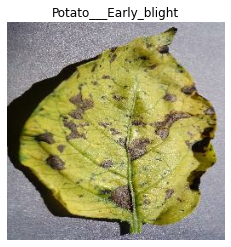

In [10]:
# Just like printing we can also display the image using matplotlib library.
# First convert it into numpy from array and then change the type too. Otherwise you will get same image with a different look.

for image_batch, label_batch in dataset.take(1):

    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

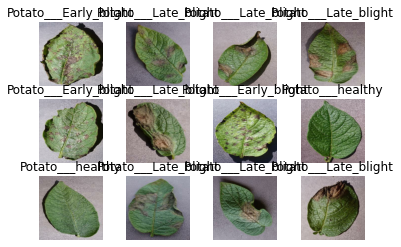

In [11]:
# Just like above we can also display a bunch of images too using for loop

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

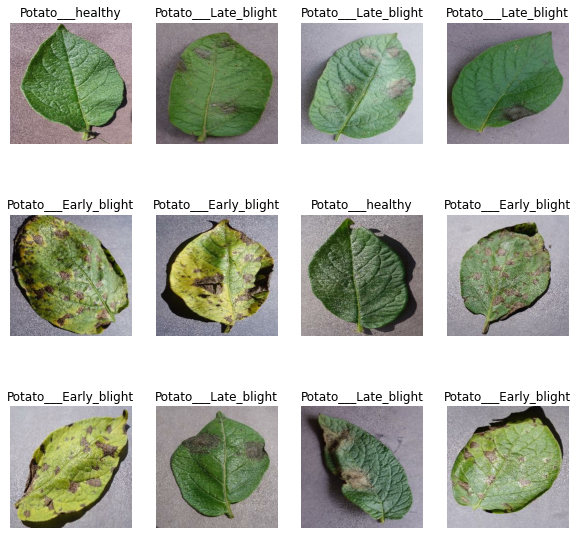

In [12]:
# Using plt.figure, we changed the figure size so that the display is easy to read unlike above.

plt.figure(figsize = (10, 10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [13]:
EPOCHS = 50

In [14]:
len(dataset)

68

In [15]:
# Here we have assigned the training data set size to be 80%.

train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [16]:
# take means it takes the first 54 entries.

train_ds = dataset.take(54)
len(train_ds)             

54

In [17]:
# skip means it takes everything but the first 54 entries.

test_ds = dataset.skip(54)
len(test_ds)

14

In [18]:
val_size = 0.1
len(dataset) * val_size

6.800000000000001

In [19]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [20]:
test_ds = test_ds.skip(6)

In [21]:
# Everything that was done above can be done in a function.
# we have also shuffled the dataset inside.
# Seed can have any value. It would still work if it was say 16 instead of 12.

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
  
    ds_size = len(ds)
    
    if(shuffle):
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(ds_size * train_split)
    val_size = int(ds_size * val_split)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds


In [22]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

54

In [24]:
len(val_ds)

6

In [25]:
len(test_ds)

8

In [26]:
# Here we have cache, then shuffled and also prefetched the data simultaneously

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
# Here we have created a layer for resizing each image to our desired 256 x 256.
# We have also rescaled the image pixel value keeping them in range 0 to 1, down from 256.

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [28]:
# We have added another layer in which we have augmented the data by rotating and flipping the images.

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [32]:
# input_shape addresses the shape of our input data. Lets say it was only (IMAGE_SIZE, IMAGE_SIZE) as one could the think then
# the computer throws an error.

# Sequential creates our model. Check the documentation for more details.
# We first ran our resize and rescale method, then the data augmentation. After which we created 6 convolutional layers with 
# pooling. Then we flattened out our network followed by a dense layer and then output neurons layer. The 32, 64 in the convo
# layer means the number of neurons that we want it to have.

# The amount of convo layers and other parameters depends on hit and trial + experience to some extent.

input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax')
])

model.build(input_shape = input_shape)

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [35]:
# After building our model, we are compiling it here by adding adam optimizer, SparseCategoricalCrossentropy for losses
# and accuracy as a metric.

model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
# Here we are training our model and storing it in a variable as well.

history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 135s 2s/step - loss: 0.9271 - accuracy: 0.4954 - val_loss: 0.8084 - val_accuracy: 0.5573
Epoch 2/50
54/54 [==============================] - 118s 2s/step - loss: 0.7206 - accuracy: 0.6771 - val_loss: 0.6013 - val_accuracy: 0.7396
Epoch 3/50
54/54 [==============================] - 119s 2s/step - loss: 0.4379 - accuracy: 0.8310 - val_loss: 0.4033 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 118s 2s/step - loss: 0.3174 - accuracy: 0.8675 - val_loss: 0.3674 - val_accuracy: 0.8542
Epoch 5/50
54/54 [==============================] - 118s 2s/step - loss: 0.2577 - accuracy: 0.8947 - val_loss: 0.2773 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 117s 2s/step - loss: 0.1826 - accuracy: 0.9311 - val_loss: 0.3260 - val_accuracy: 0.8698
Epoch 7/50
54/54 [==============================] - 119s 2s/step - loss: 0.1844 - accuracy: 0.9329 - val_loss: 0.3657 - val_accuracy: 0.8438
Epoch 8/50
54

In [37]:
# Here we got a 98.8% accuracy score which is pretty good.

scores = model.evaluate(test_ds)
scores

8/8 [==============================] - 4s 328ms/step - loss: 0.0349 - accuracy: 0.9883


[0.03486284613609314, 0.98828125]

In [38]:
history

In [39]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

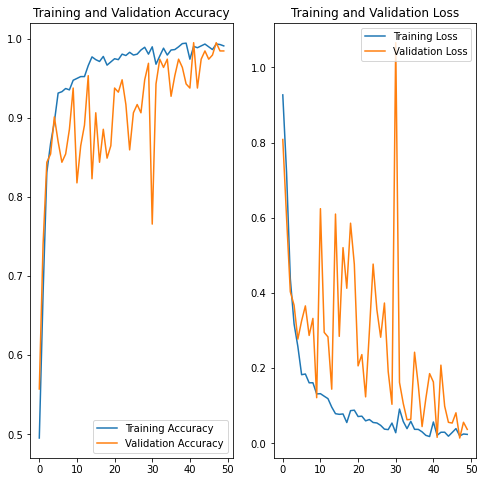

In [42]:
# Here we are plotting accuracy and loss

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 0s 497ms/step
predicted label: Potato___Late_blight


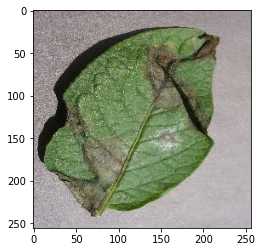

In [43]:
# Here we are running prediction on a sample.

import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


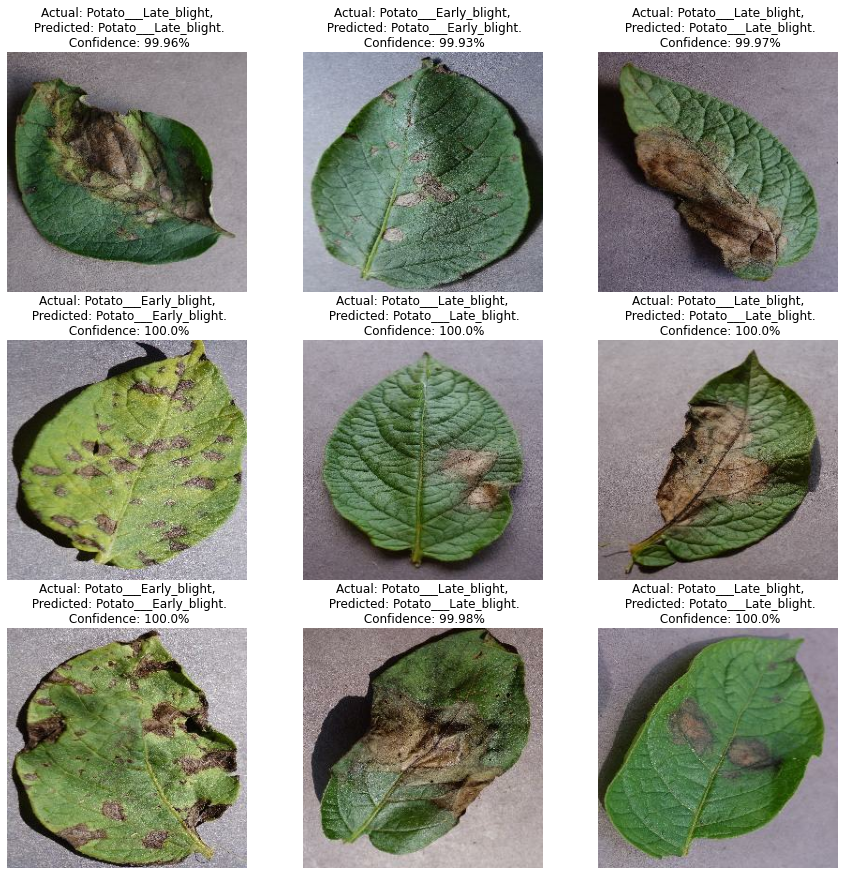

In [45]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [56]:
# Here we are saving the model

import os

model_version=max([int(i) for i in os.listdir("models") + [0]])+1
model.save(f"models/{model_version}")

ValueError: invalid literal for int() with base 10: '{model_version}'

In [55]:
model.save("potatoes.h5")